In [70]:
# Import all the necessary modules and libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time

In [71]:
# Create a transform to augment the existing dataset in order to avoid overfitting
Transform = transforms.ToTensor()
# Download the MNIST dataset and divide the dataset into testing and training data
# Train:Test data is in the ratio of 6:1
train = datasets.MNIST(root= 'data', train=True, download=True, transform=Transform)
test = datasets.MNIST(root='data',train = False, download=True, transform=Transform)

In [72]:
# Prepare and set up the data loader 
# Data loader turns the dataset into an iterable and splits the dataset into batches for the model to fit on
# Batch size is 32 (Can be changed but I have kept it in multiples of 8)
train_loader = DataLoader(train, batch_size=32, shuffle=True)
test_loader = DataLoader(test, batch_size=32, shuffle=False)
class_labels = train.classes

In [73]:
# Building an MLP model to fit the data loader
class MLPModel(nn.Module):
  # Creating a class that inherits from nn.module and overriding the forward function
  def __init__(self, input_features: int, 
               output_features: int, hidden_units: int):
    super().__init__()
    # Initialize 2 hidden layers and 1 output layer
    # Non-Linear Activation function ReLU is used
    self.linear_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
        nn.ReLU())
  # Computing the output tensors from the input tensors
  def forward(self,x):
    return self.linear_stack(x)

In [74]:
# Generator object (sets the seed for generating random numbers)
torch.manual_seed(42)
# Initializing the model
# Input is 28*28 images = 784 pixels, Output features = 10
model= MLPModel(784,len(class_labels),100)
print(model)

MLPModel(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
    (6): ReLU()
  )
)


In [75]:
# Setting up the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [76]:
# Train function
# Initialize training loss and accuracy
train_losses=[]
train_accu=[]
# Initialize training function
def train(epoch):
  print('\nEpoch : %d'%epoch)
  model.train()
  running_loss=0
  correct=0
  total=0

  for data in tqdm(train_loader):    
    inputs=data[0]
    labels=data[1]
    outputs=model(inputs)
    loss=loss_fn(outputs,labels)
    
    optimizer.zero_grad() # Done in order to make the gradients 0 after each iteration
    loss.backward() # Triggers backpropogation
    optimizer.step() # Parameter Update - Re-evaluates the model and returns the loss

    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()
  # Compute and update the training loss and accuracy for each epoch    
  train_loss=running_loss/len(train_loader)
  accu=100.*correct/total
  # Append all the losses for the epochs
  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [77]:
# Test funtion
# Initialize testing loss and accuracy
test_losses=[]
test_accu=[]

def test(epoch):
  model.eval()
  running_loss=0
  correct=0
  total=0

  with torch.no_grad():
    for data in tqdm(test_loader):
      inputs=data[0]
      labels = data[1]
      # Compute output
      outputs=model(inputs)
    
      loss= loss_fn(outputs,labels)
      running_loss+=loss.item()
      
      _, predicted = outputs.max(1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()
  # Update and calculate test loss
  # Do not calculate gradients during testing
  test_loss=running_loss/len(test_loader)
  accu=100.*correct/total
  # Update testing loss and accuracy after each epoch
  test_losses.append(test_loss)
  test_accu.append(accu)
  print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))

In [78]:
# Run the training and testing functions for any number of epochs
epochs=15
for epoch in range(1,epochs+1): 
  train(epoch)
  test(epoch)


Epoch : 1


100%|██████████| 1875/1875 [00:12<00:00, 147.49it/s]


Train Loss: 0.711 | Accuracy: 74.705


100%|██████████| 313/313 [00:01<00:00, 239.45it/s]


Test Loss: 0.619 | Accuracy: 76.140

Epoch : 2


100%|██████████| 1875/1875 [00:12<00:00, 144.24it/s]


Train Loss: 0.363 | Accuracy: 86.960


100%|██████████| 313/313 [00:01<00:00, 245.18it/s]


Test Loss: 0.342 | Accuracy: 87.160

Epoch : 3


100%|██████████| 1875/1875 [00:13<00:00, 143.21it/s]


Train Loss: 0.315 | Accuracy: 88.015


100%|██████████| 313/313 [00:01<00:00, 240.18it/s]


Test Loss: 0.324 | Accuracy: 87.710

Epoch : 4


100%|██████████| 1875/1875 [00:13<00:00, 143.50it/s]


Train Loss: 0.294 | Accuracy: 88.487


100%|██████████| 313/313 [00:01<00:00, 236.08it/s]


Test Loss: 0.317 | Accuracy: 87.910

Epoch : 5


100%|██████████| 1875/1875 [00:13<00:00, 141.15it/s]


Train Loss: 0.279 | Accuracy: 88.798


100%|██████████| 313/313 [00:01<00:00, 233.80it/s]


Test Loss: 0.313 | Accuracy: 88.020

Epoch : 6


100%|██████████| 1875/1875 [00:13<00:00, 140.90it/s]


Train Loss: 0.270 | Accuracy: 89.080


100%|██████████| 313/313 [00:01<00:00, 226.79it/s]


Test Loss: 0.317 | Accuracy: 88.210

Epoch : 7


100%|██████████| 1875/1875 [00:14<00:00, 131.98it/s]


Train Loss: 0.264 | Accuracy: 89.243


100%|██████████| 313/313 [00:01<00:00, 228.19it/s]


Test Loss: 0.300 | Accuracy: 88.400

Epoch : 8


100%|██████████| 1875/1875 [00:13<00:00, 143.07it/s]


Train Loss: 0.256 | Accuracy: 89.380


100%|██████████| 313/313 [00:01<00:00, 249.40it/s]


Test Loss: 0.313 | Accuracy: 88.380

Epoch : 9


100%|██████████| 1875/1875 [00:13<00:00, 143.99it/s]


Train Loss: 0.252 | Accuracy: 89.493


100%|██████████| 313/313 [00:01<00:00, 239.24it/s]


Test Loss: 0.317 | Accuracy: 88.250

Epoch : 10


100%|██████████| 1875/1875 [00:13<00:00, 143.94it/s]


Train Loss: 0.248 | Accuracy: 89.598


100%|██████████| 313/313 [00:01<00:00, 239.60it/s]


Test Loss: 0.310 | Accuracy: 88.440

Epoch : 11


100%|██████████| 1875/1875 [00:13<00:00, 142.81it/s]


Train Loss: 0.246 | Accuracy: 89.707


100%|██████████| 313/313 [00:01<00:00, 237.46it/s]


Test Loss: 0.311 | Accuracy: 88.450

Epoch : 12


100%|██████████| 1875/1875 [00:12<00:00, 145.08it/s]


Train Loss: 0.246 | Accuracy: 89.663


100%|██████████| 313/313 [00:01<00:00, 233.36it/s]


Test Loss: 0.328 | Accuracy: 88.330

Epoch : 13


100%|██████████| 1875/1875 [00:12<00:00, 144.54it/s]


Train Loss: 0.242 | Accuracy: 89.785


100%|██████████| 313/313 [00:01<00:00, 236.54it/s]


Test Loss: 0.329 | Accuracy: 88.230

Epoch : 14


100%|██████████| 1875/1875 [00:12<00:00, 144.94it/s]


Train Loss: 0.242 | Accuracy: 89.773


100%|██████████| 313/313 [00:01<00:00, 241.34it/s]


Test Loss: 0.332 | Accuracy: 88.240

Epoch : 15


100%|██████████| 1875/1875 [00:12<00:00, 146.42it/s]


Train Loss: 0.240 | Accuracy: 89.842


100%|██████████| 313/313 [00:01<00:00, 244.93it/s]

Test Loss: 0.352 | Accuracy: 87.970


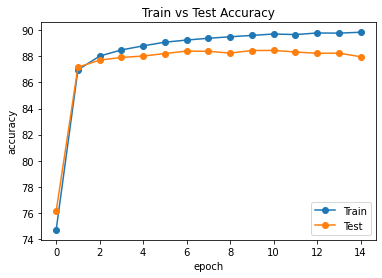

In [79]:
#plot accuracies
plt.plot(train_accu,'-o')
plt.plot(test_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
plt.show()

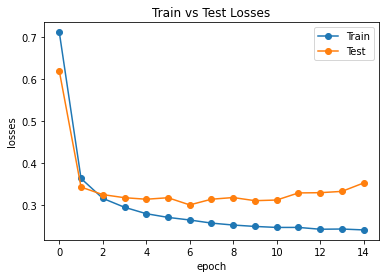

In [80]:
#plot losses
plt.plot(train_losses,'-o')
plt.plot(test_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')
plt.show()